# Plot of LI space

### import modules

In [1]:
import os
import fnmatch
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

### make many pairs of Left and Right Values

In [2]:
x_min, x_max = 0,1
y_min, y_max = 0,1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

In [3]:
xyPairs = np.c_[xx.ravel(), yy.ravel()]

In [4]:
xyPairs.shape

(10000, 2)

### compute a simple difference Left-Right

In [5]:
def makeDiff(xyPairs):
    z = []
    for entry in xyPairs:
        l,r = entry
        try:
            thisLI = l-r
        except:
            thisLI = np.nan

        z.append(thisLI)

    z = np.array(z)
    
    return z

In [6]:
diff = makeDiff(xyPairs)

In [7]:
diffZ = diff.reshape((xx.shape))

In [8]:
def makeAdd(xyPairs):
    z = []
    for entry in xyPairs:
        l,r = entry
        try:
            thisLI = l+r
        except:
            thisLI = np.nan

        z.append(thisLI)

    z = np.array(z)
    
    return z

In [9]:
add = makeAdd(xyPairs)

In [10]:
addZ = add.reshape(xx.shape)

### compute the LI

In [11]:
def makeLI(xyPairs):
    z = []
    for entry in xyPairs:
        l,r = entry
        try:
            thisLI = (l-r)/(l+r)
        except:
            thisLI = np.nan

        z.append(thisLI)

    z = np.array(z)
    return z

In [12]:
liZ = makeLI(xyPairs).reshape((xx.shape))

/data/martin/frontSub/venv/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


### difference between the two, with similar values giving low score (dissimilarity measure)

In [13]:
compareZ = liZ-diffZ

### plot

In [16]:
sns.set_context('poster')

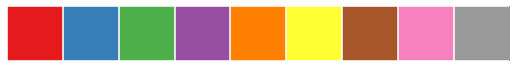

In [17]:
annotPalette = sns.color_palette('Set1',9)
sns.palplot(annotPalette)

### simple plot

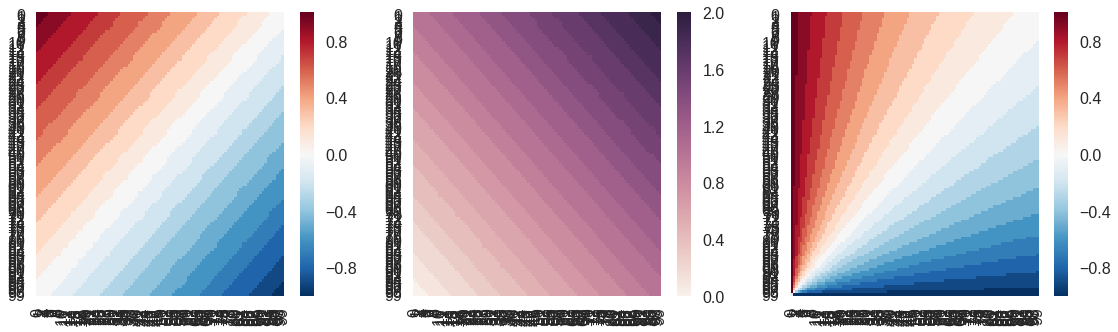

In [20]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,5))

sns.heatmap(diffZ.T[::-1].round(1),ax=ax1)
sns.heatmap(addZ.T[::-1].round(1),ax=ax2)
sns.heatmap(liZ.T[::-1].round(1),ax=ax3)

plt.tight_layout()
plt.show()

### styled plot

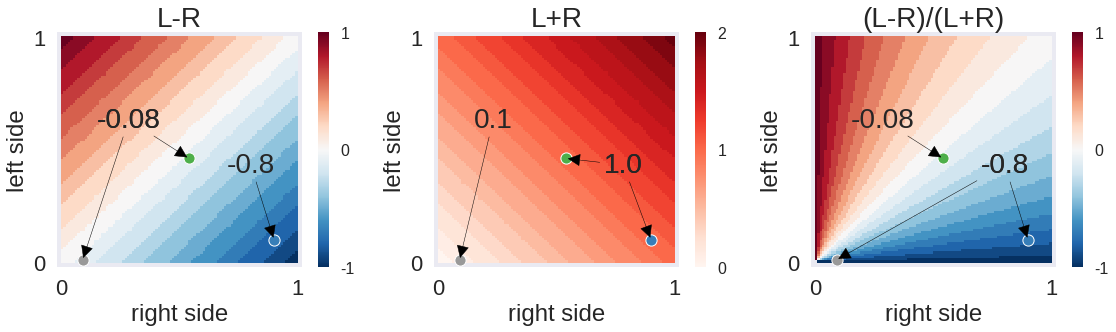

In [21]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,5))

sns.heatmap(diffZ.T[::-1].round(1),ax=ax1,cmap='RdBu_r',
            cbar_kws={'format':'%.0f',
                      'ticks':([-1,0,1])
                     })
           
sns.heatmap(addZ.T[::-1].round(1),ax=ax2,cmap='Reds',
            cbar_kws={'format':'%.0f',
                      'ticks':([0,1,2])
                     })

sns.heatmap(liZ.T[::-1].round(1),ax=ax3,cmap='RdBu_r',
            cbar_kws={'format':'%.0f',
                      'ticks':([-1,0,1])
                     })

### plot titles

ax1.set_title('L-R',fontsize=28)
ax2.set_title('L+R',fontsize=28)
ax3.set_title('(L-R)/(L+R)',fontsize=28)


### axes ticks

ax1.set_xticks(np.arange(0,101,100));
ax1.set_xticklabels(['%.0f'%x for x in np.arange(0,1.1,1)],rotation=360,fontsize=22); # cave: it is odd that a rotation of 360 is required in order to rotate by 90 degrees (but this is apparently the behavior)

ax1.set_yticks(np.arange(0,101,100));
ax1.set_yticklabels(['%.0f'%x for x in np.arange(0,1.1,1)],rotation=360,fontsize=22);

ax2.set_xticks(np.arange(0,101,100));
ax2.set_xticklabels(['%.0f'%x for x in np.arange(0,1.1,1)],rotation=360,fontsize=22);

ax2.set_yticks(np.arange(0,101,100));
ax2.set_yticklabels(['%.0f'%x for x in np.arange(0,1.1,1)],rotation=360,fontsize=22);

ax3.set_xticks(np.arange(0,101,100));
ax3.set_xticklabels(['%.0f'%x for x in np.arange(0,1.1,1)],rotation=360,fontsize=22);

ax3.set_yticks(np.arange(0,101,100));
ax3.set_yticklabels(['%.0f'%x for x in np.arange(0,1.1,1)],rotation=360,fontsize=22);


ax1.set_xlim(-2,102)
ax1.set_ylim(-2,102)

ax2.set_xlim(-2,102)
ax2.set_ylim(-2,102)

ax3.set_xlim(-2,102)
ax3.set_ylim(-2,102)

### axes labels

ax1.set_xlabel('right side',fontsize=24)
ax1.set_ylabel('left side',fontsize=24)

ax2.set_xlabel('right side',fontsize=24)
ax2.set_ylabel('left side',fontsize=24)

ax3.set_xlabel('right side',fontsize=24)
ax3.set_ylabel('left side',fontsize=24)


### points

ax1.plot(90,10,'o',color=annotPalette[1],markeredgecolor='white',markeredgewidth=1)
ax1.annotate(s='-0.8',xy=(90,10),arrowprops={'arrowstyle':'-|>','color':'k'},xytext=(70, 40),fontsize=28)

ax1.plot(9,1,'o',color=annotPalette[-1],markeredgecolor='white',markeredgewidth=1)
ax1.annotate(s='-0.08',xy=(9,1),arrowprops={'arrowstyle':'-|>','color':'k'},xytext=(15, 60),fontsize=28)

ax1.plot(54,46,'o',color=annotPalette[2],markeredgecolor='white',markeredgewidth=1)
ax1.annotate(s='-0.08',xy=(54,46),arrowprops={'arrowstyle':'-|>','color':'k'},xytext=(15, 60),fontsize=28)

    
ax2.plot(90,10,'o',color=annotPalette[1],markeredgecolor='white',markeredgewidth=1)
ax2.annotate(s='1.0',xy=(90,10),arrowprops={'arrowstyle':'-|>','color':'k'},xytext=(70, 40),fontsize=28)

ax2.plot(9,1,'o',color=annotPalette[-1],markeredgecolor='white',markeredgewidth=1)
ax2.annotate(s='0.1',xy=(9,1),arrowprops={'arrowstyle':'-|>','color':'k'},xytext=(15, 60),fontsize=28)

ax2.plot(54,46,'o',color=annotPalette[2],markeredgecolor='white',markeredgewidth=1)
ax2.annotate(s='1.0',xy=(54,46),arrowprops={'arrowstyle':'-|>','color':'k'},xytext=(70, 40),fontsize=28)


ax3.plot(90,10,'o',color=annotPalette[1],markeredgecolor='white',markeredgewidth=1)
ax3.annotate(s='-0.8',xy=(90,10),arrowprops={'arrowstyle':'-|>','color':'k'},xytext=(70, 40),fontsize=28)

ax3.plot(9,1,'o',color=annotPalette[-1],markeredgecolor='white',markeredgewidth=1)
ax3.annotate(s='-0.8',xy=(9,1),arrowprops={'arrowstyle':'-|>','color':'k'},xytext=(70, 40),fontsize=28)

ax3.plot(54,46,'o',color=annotPalette[2],markeredgecolor='white',markeredgewidth=1)
ax3.annotate(s='-0.08',xy=(54,46),arrowprops={'arrowstyle':'-|>','color':'k'},xytext=(15, 60),fontsize=28)

plt.tight_layout()

plt.savefig('../reports/figures/01-li-space-example.png',dpi=300,bbox_inches='tight')

plt.show()